## Load Packages

In [1]:
import os
import pandas as pd
from IPython.display import Markdown as md
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as cp
from sklearn.linear_model import LinearRegression

plt.style.use("fivethirtyeight")

## Import Data

In [3]:
heart_dft = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
heart_dft.head(), heart_dft.shape

(   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
 0   40   M           ATA        140          289          0     Normal    172   
 1   49   F           NAP        160          180          0     Normal    156   
 2   37   M           ATA        130          283          0         ST     98   
 3   48   F           ASY        138          214          0     Normal    108   
 4   54   M           NAP        150          195          0     Normal    122   
 
   ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
 0              N      0.0       Up             0  
 1              N      1.0     Flat             1  
 2              N      0.0       Up             0  
 3              Y      1.5     Flat             1  
 4              N      0.0       Up             0  ,
 (918, 12))

Observations:

* We have a dataset with 12 variables and 918 rows
* We have different data types

## Get the dataset's informatio

In [4]:
heart_dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Observations:

* Seven(7) numeric variables and five(5) variables type object 
* No missing data in this Dataset
* Variables names in Pascal Case, I will keep it like that.
* will convert object variables to category data type

### Convert object vars and "FastingBS" var to Categorical data type

In [5]:
heart_dft[
    [
        "ChestPainType",
        "Sex",
        "FastingBS",
        "RestingECG",
        "ExerciseAngina",
        "ST_Slope",
        "HeartDisease",
    ]
] = heart_dft[
    [
        "ChestPainType",
        "Sex",
        "FastingBS",
        "RestingECG",
        "ExerciseAngina",
        "ST_Slope",
        "HeartDisease",
    ]
].astype(
    "category"
)

### Replace "M" with Male and "F" with Female and HeartDisease to Yes and No.

In [6]:
heart_dft["Sex"] = heart_dft["Sex"].map({"M": "Male", "F": "Female"})
heart_dft["Sex"]
heart_dft["HeartDisease"] = heart_dft["HeartDisease"].map({0: "No", 1: "Yes"})
heart_dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(1), int64(4)
memory usage: 43.2 KB


lets use describe() for summary statistics!

In [7]:
heart_dft.describe().round()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.0,918.0,918.0,918.0,918.0
mean,54.0,132.0,199.0,137.0,1.0
std,9.0,19.0,109.0,25.0,1.0
min,28.0,0.0,0.0,60.0,-3.0
25%,47.0,120.0,173.0,120.0,0.0
50%,54.0,130.0,223.0,138.0,1.0
75%,60.0,140.0,267.0,156.0,2.0
max,77.0,200.0,603.0,202.0,6.0


### Counts of each Calegorical Vars ("ChestPainType", "Sex", "RestingECG", "ExerciseAngina", "ST_Slope")

#### Sex Var

In [8]:
sex_counts = heart_dft["Sex"].value_counts(normalize=True).round(2) * 100
sex_counts = sex_counts.reset_index().rename(columns={"Sex": "Pct", "index": "Sex"})
sex_counts

,Sex,Pct
0,Male,79.0
1,Female,21.0


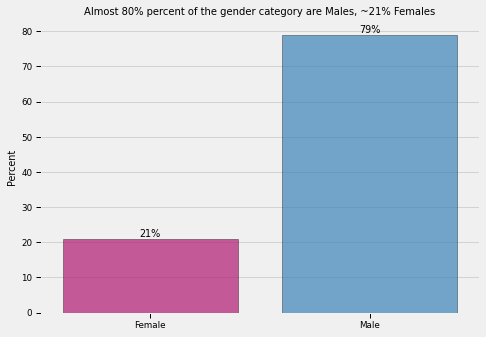

In [9]:
plt.figure(figsize=(7, 5))
sns.set_context("paper")

sex_color = dict({"Male": "#2986cc", "Female": "#c90076"})

ax1 = sns.barplot(
    data=sex_counts,
    x="Sex",
    #errorbar=None,
    y="Pct",
    palette=sex_color,
    linewidth=0.5,
    edgecolor="black",
    alpha=0.7,
)

values1 = ax1.containers[0].datavalues
labels = ["{:g}%".format(val) for val in values1]
ax1.bar_label(ax1.containers[0], labels=labels)

ax1.set_ylabel("Percent")
ax1.set_xlabel("")
ax1.set_title(
    "Almost 80% percent of the gender category are Males, ~21% Females", fontsize=10
)


plt.show()

Observations:

* Imbalanced data in terms of the Sex variable

#### ChestPainType Vs Sex

In [10]:
ChestPainType_vs_Sex = (
    heart_dft[["ChestPainType", "Sex"]]
    .value_counts(normalize=True)
    .reset_index(name="Pct")
    .sort_values(by="ChestPainType")
)
ChestPainType_vs_Sex["Pct"] = ChestPainType_vs_Sex["Pct"].round(2) * 100
ChestPainType_vs_Sex

,ChestPainType,Sex,Pct
0,ASY,Male,46.0
3,ASY,Female,8.0
2,ATA,Male,12.0
4,ATA,Female,7.0
1,NAP,Male,16.0
5,NAP,Female,6.0
6,TA,Male,4.0
7,TA,Female,1.0


### RestingECG

In [11]:
RestingECG_vs_Sex = (
    heart_dft[["RestingECG", "Sex"]]
    .value_counts(normalize=True)
    .reset_index(name="Pct")
    .sort_values(by="RestingECG")
)
RestingECG_vs_Sex["Pct"] = RestingECG_vs_Sex["Pct"].round(2) * 100
RestingECG_vs_Sex.sort_values(by="Pct", ascending=False)

,RestingECG,Sex,Pct
0,Normal,Male,47.0
1,ST,Male,16.0
2,LVH,Male,15.0
3,Normal,Female,13.0
4,LVH,Female,5.0
5,ST,Female,3.0


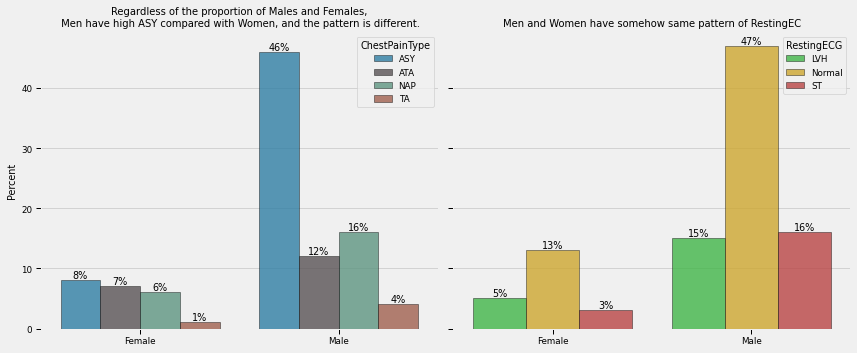

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

palette4 = {"ASY": "#1b85b8", "ATA": "#5a5255", "NAP": "#559e83", "TA": "#ae5a41"}

palette5 = {"LVH": "#2dc937", "Normal": "#e7b416", "ST": "#cc3232"}

sns.barplot(
    data=ChestPainType_vs_Sex,
    x="Sex",
    hue="ChestPainType",
    #errorbar=None,
    y="Pct",
    palette=palette4,
    linewidth=0.5,
    edgecolor="black",
    alpha=0.8,
    ax=ax[0],
)

for ax1 in [ax[0]]:
    for container in ax1.containers:
        values2 = container.datavalues
        labels = ["{:g}%".format(val) for val in values2]
        ax1.bar_label(container, labels=labels)

ax[0].set_ylabel("Percent")
ax[0].set_xlabel("")
ax[0].set_title(
    "Regardless of the proportion of Males and Females,\n Men have high ASY compared with Women, and the pattern is different.",
    fontsize=10,
)


sns.barplot(
    data=RestingECG_vs_Sex,
    x="Sex",
    hue="RestingECG",
    #errorbar=None,
    y="Pct",
    palette=palette5,
    linewidth=0.5,
    edgecolor="black",
    alpha=0.8,
    ax=ax[1],
)

for ax2 in [ax[1]]:
    for container in ax2.containers:
        values3 = container.datavalues
        labels = ["{:g}%".format(val) for val in values3]
        ax2.bar_label(container, labels=labels)

ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title("Men and Women have somehow same pattern of RestingEC", fontsize=10)


plt.tight_layout()
plt.show()

Observations:

* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

The majority 46% of the Male participants are in ASY category

* RestingBP: resting blood pressure taking a rest for min five(5) minutes before blood pressure measurement

The majority of the participants are in the Normal category

Note: The percentage is calculated using all participants, NOT within each group of Sex

### ExerciseAngina and ST_Slope

In [13]:
ExerciseAngina_vs_Sex = (
    heart_dft[["ExerciseAngina", "Sex"]]
    .value_counts(normalize=True)
    .reset_index(name="Pct")
    .sort_values(by="ExerciseAngina")
)
ExerciseAngina_vs_Sex["Pct"] = ExerciseAngina_vs_Sex["Pct"].round(2) * 100


ST_Slope_vs_Sex = (
    heart_dft[["ST_Slope", "Sex"]]
    .value_counts(normalize=True)
    .reset_index(name="Pct")
    .sort_values(by="ST_Slope")
)
ST_Slope_vs_Sex["Pct"] = ST_Slope_vs_Sex["Pct"].round(2) * 100

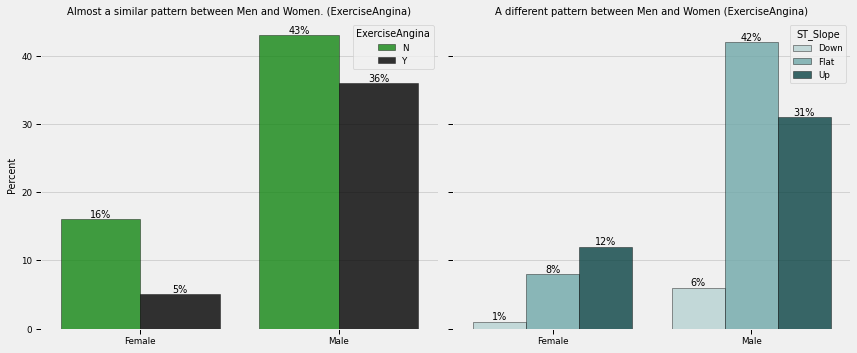

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

palette6 = {
    "Y": "#000000",
    "N": "#009900",
}

palette7 = {"Down": "#b2d8d8", "Flat": "#66b2b2", "Up": "#004c4c"}

sns.barplot(
    data=ExerciseAngina_vs_Sex,
    x="Sex",
    hue="ExerciseAngina",
    #errorbar=None,
    y="Pct",
    palette=palette6,
    linewidth=0.5,
    edgecolor="black",
    alpha=0.8,
    ax=ax[0],
)

for ax3 in [ax[0]]:
    for container in ax3.containers:
        values2 = container.datavalues
        labels = ["{:g}%".format(val) for val in values2]
        ax3.bar_label(container, labels=labels)

ax[0].set_ylabel("Percent")
ax[0].set_xlabel("")
ax[0].set_title(
    "Almost a similar pattern between Men and Women. (ExerciseAngina)", fontsize=10
)


sns.barplot(
    data=ST_Slope_vs_Sex,
    x="Sex",
    hue="ST_Slope",
    #errorbar=None,
    y="Pct",
    palette=palette7,
    linewidth=0.5,
    edgecolor="black",
    alpha=0.8,
    ax=ax[1],
)

for ax4 in [ax[1]]:
    for container in ax4.containers:
        values3 = container.datavalues
        labels = ["{:g}%".format(val) for val in values3]
        ax4.bar_label(container, labels=labels)

ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title(
    "A different pattern between Men and Women (ExerciseAngina)", fontsize=10
)


plt.tight_layout()
plt.show()

Note:

* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Angina is a type of chest pain caused by reduced blood flow to the heart

* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
Mainly Flat in (Males) and relatively Up in (Females) 

### Numeric Vars ("Age", "Cholesterol", "MaxHR", "Oldpeak")

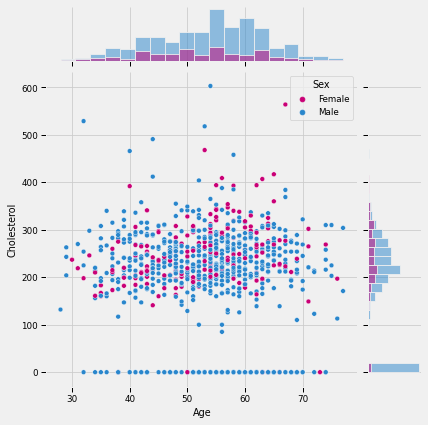

In [15]:
filtheart_dft = heart_dft["Cholesterol"] > 0
heart_dft_chol_n0 = heart_dft[filtheart_dft]

sns.JointGrid(
    data=heart_dft, x="Age", y="Cholesterol", hue="Sex", palette=sex_color
).plot(sns.scatterplot, sns.histplot)
plt.show()

Observations:

* It is somehow the same pattern for Male and Female relative to their counts!
* We have many of 0 values in the Cholesterol var!!

* Let's use lmplot to see the regression line of each group.
* I think we have to remove the 0 values in the Cholesterol var and check again!

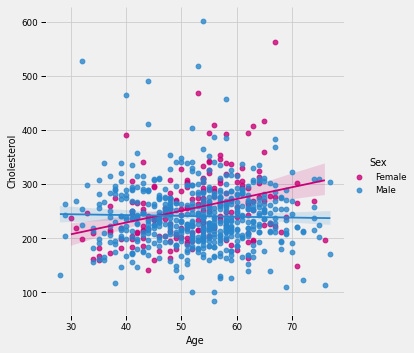

In [16]:
sns.lmplot(
    data=heart_dft_chol_n0,
    x="Age",
    y="Cholesterol",
    hue="Sex",
    palette=sex_color,
).set(ylabel="Cholesterol", xlabel="Age", title="")
plt.show()

* We may need to do some t-test to check whether the true means difference is equal to 0 or Not. we can scipy package to do that, but for now, let's move on...

### Find the mean Cholesterol by Sex

In [17]:
Chol_mean_f = (
    heart_dft_chol_n0[["Sex", "Cholesterol"]]
    .groupby(["Sex"])
    .mean("Cholesterol")
    .loc["Female", "Cholesterol"]
).round()
Chol_mean_m = (
    heart_dft_chol_n0[["Sex", "Cholesterol"]]
    .groupby(["Sex"])
    .mean("Cholesterol")
    .loc["Male", "Cholesterol"]
).round()

print("for Female =", Chol_mean_f, "for Male =", Chol_mean_m)

for Female = 256.0 for Male = 241.0


* Somehow Same mean

let's try to plot the result!

### Cholesterol var, density distribution, Male VS Female

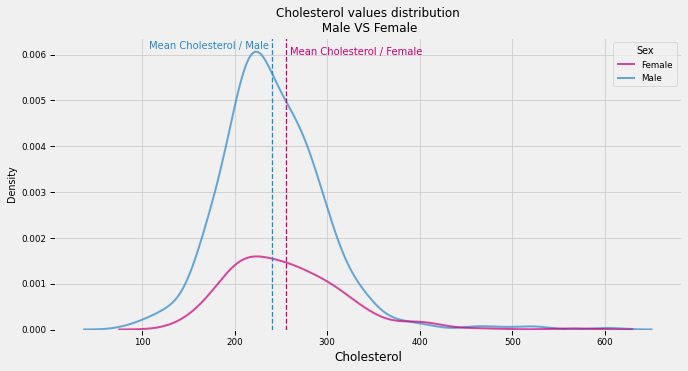

In [18]:
plt.figure(figsize=(10, 5))
sns.set_context("paper")

kdeplt = sns.kdeplot(
    data=heart_dft_chol_n0,
    x="Cholesterol",
    hue="Sex",
    palette=sex_color,
    alpha=0.7,
    lw=2,
)
kdeplt.set_title("Cholesterol values distribution\n Male VS Female", fontsize=12)
kdeplt.set_xlabel("Cholesterol", fontsize=12)


plt.axvline(x=Chol_mean_f, color="#c90076", ls="--", lw=1.3)
plt.axvline(x=Chol_mean_m, color="#2986cc", ls="--", lw=1.3)
plt.text(108, 0.00612, "Mean Cholesterol / Male", fontsize=10, color="#2986cc")
plt.text(260, 0.006, "Mean Cholesterol / Female", fontsize=10, color="#c90076")


plt.show()

* Indeed, they are similar, regardless of the sample size of females.
* Again, to make a sufficient result, we have to do t-test or linear regression.

In [19]:
heart_dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(1), int64(4)
memory usage: 43.2 KB


### Target Variable - HeartDisease

#### Counts

In [20]:
HeartDisease_counts = (
    heart_dft[["HeartDisease"]]
    .value_counts(normalize=True)
    .reset_index(name="Pct")
    .sort_values(by="HeartDisease")
)
HeartDisease_counts["Pct"] = HeartDisease_counts["Pct"].round(2) * 100
HeartDisease_counts

,HeartDisease,Pct
1,No,45.0
0,Yes,55.0


* Somehow balanced

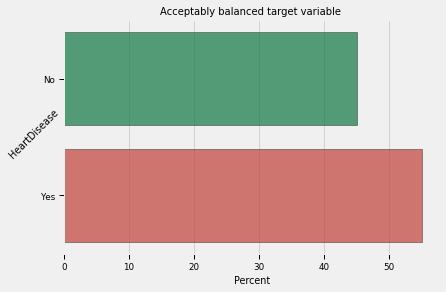

In [21]:
HeartDisease_colors = {"Yes": "#d62d20", "No": "#008744"}
hplt = sns.barplot(
    data=HeartDisease_counts,
    x="Pct",
    #errorbar=None,
    y="HeartDisease",
    palette=HeartDisease_colors,
    linewidth=0.5,
    edgecolor="black",
    alpha=0.7,
)

hplt.set_ylabel("HeartDisease", rotation=45)
hplt.set_xlabel("Percent")
hplt.set_title("Acceptably balanced target variable ", fontsize=10)
plt.show()

### Pairplot

#### Removing zeros from Oldpeak and Cholesterol vars

In [22]:
filtered_for_pairplot = heart_dft.loc[
    (heart_dft["Oldpeak"] > 0) & (heart_dft["Cholesterol"] > 0)
]

#### Creats a sample of 150 to speed up the ploting process

In [23]:
pairplot_df = (
    filtered_for_pairplot.groupby(["Sex"])  # Stratify by "Sex"
    .apply(lambda x: x.sample(75))  # 75 for each Sex
    .reset_index(drop=True)  # int64 index type, back to default!
)

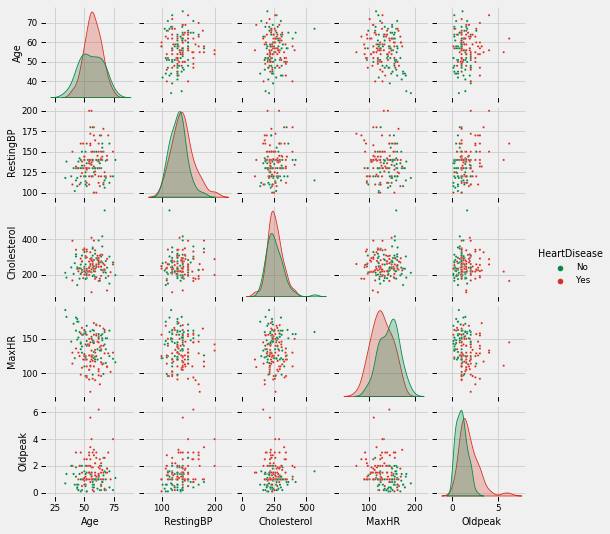

In [24]:
sns.pairplot(
    pairplot_df,
    hue="HeartDisease",
    kind="scatter",
    diag_kind="kde",
    palette=HeartDisease_colors,
    height=1.5,
    aspect=1,
    plot_kws=dict(s=5),
)
plt.show()

Observations:

* In general, there is no big difference in the diagonal plot, Oldpeak and cholesterol however, have some extreme data points

In [25]:
HeartDisease_by_Sex = (
    heart_dft.groupby(["Sex"])["HeartDisease"]
    .value_counts(normalize=True)
    .reset_index(name="Pct")
).rename(columns={"level_1": "HeartDisease"})

HeartDisease_by_Sex["Pct"] = HeartDisease_by_Sex["Pct"].round(2) * 100

HeartDisease_by_Sex

,Sex,HeartDisease,Pct
0,Female,No,74.0
1,Female,Yes,26.0
2,Male,Yes,63.0
3,Male,No,37.0


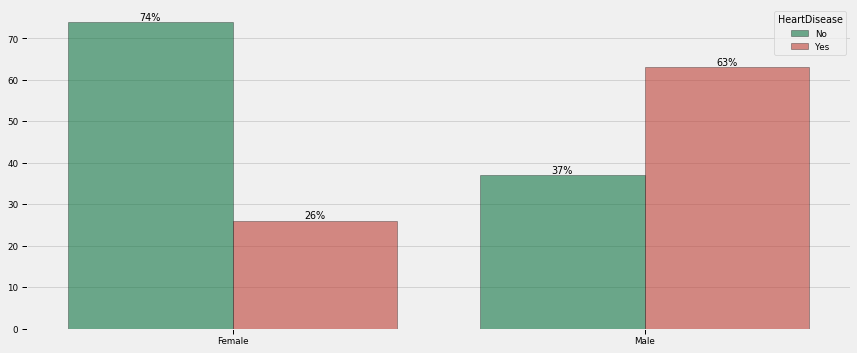

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

hplt = sns.barplot(
    data=HeartDisease_by_Sex,
    x="Sex",
    #errorbar=None,
    y="Pct",
    hue="HeartDisease",
    linewidth=0.5,
    edgecolor="black",
    palette=HeartDisease_colors,
    alpha=0.6,
    ax=ax,
)

for axhs in [ax]:
    for container in axhs.containers:
        values_hs = container.datavalues
        labels = ["{:g}%".format(val) for val in values_hs]
        axhs.bar_label(container, labels=labels)

ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("", fontsize=10)


plt.tight_layout()
plt.show()

plt.show()

Note:

* According to this dataset, 26% of females have developed Heart Disease, and 74% Have not. and

* 63% of Males have developed Heart Disease, and 37% have not.

#### Lets check the maximum heart rate by age and Sex using FacetGrid

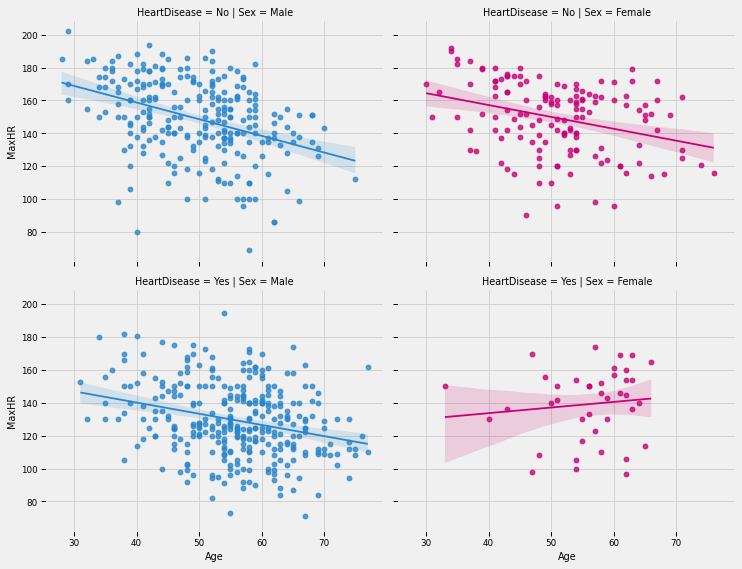

In [27]:
heart_df_fg = sns.FacetGrid(
    data=heart_dft_chol_n0,
    col="Sex",
    hue="Sex",
    row="HeartDisease",
    height=4,
    aspect=1.3,
    palette=sex_color,
    col_order=["Male", "Female"],
)
heart_df_fg.map_dataframe(sns.regplot, "Age", "MaxHR")
plt.show()

Note:

* We can see that the correlation between Age and MaxHR in Males is negative in both heart disease categories

* Females have got positive correlation between Age and MaxHR in the heart disease category Yes, and a negative correlation in the heart disease category "No"

* It is worth noting that the range of Age range of females in category Yes is from ~ 30 to ~65, and it is from ~30 to ~ 75 in category No

* The range Age of Males in the category Yes is from ~ 30 to ~70, however it is from ~30 to ~ 77 in the category No

#### Lets find the mean of Age, Cholesterol, MaxHR and RestingBP, by sex and HeartDisease vars!

In [28]:
heart_dft_chol_n0.groupby(["Sex", "HeartDisease"]).agg(
    Age_mean=pd.NamedAgg("Age", "mean"),
    Cholesterol_mean=pd.NamedAgg("Cholesterol", "mean"),
    MaxHR_mean=pd.NamedAgg("MaxHR", "mean"),
    RestingBP_mean=pd.NamedAgg("RestingBP", "mean"),
).reset_index().round(2)

,Sex,HeartDisease,Age_mean,Cholesterol_mean,MaxHR_mean,RestingBP_mean
0,Female,No,51.12,249.18,149.18,128.77
1,Female,Yes,56.02,279.18,139.25,143.38
2,Male,No,49.63,232.81,148.99,130.96
3,Male,Yes,55.83,247.50,129.45,135.24


Observations:

Females:

* The Cholesterol_mean value in females who developed heart disease is higher (279) than in those who did not (249)

* The RestingBP_mean value in females who developed heart disease is also higher (143) than in those who did not (128.7)

* MaxHR_mean in females who did develop heart disease is LOWER (139) than in those who did not (149)

Males:

* The Cholesterol_mean value in Males who developed heart disease is higher (247) than in those who did not (232)

* The RestingBP_mean value in Males who developed heart disease is slightly higher (135) than in those who did not (130.9)

* MaxHR_mean in Males who did develop heart disease is LOWER (129) than in those who did not (148.9)

Thank you for reading, and your comments are greatly appreciated.